In [1]:
### Additional code created for the review process


import pandas as pd

df = pd.read_csv('alpha_aggregated.tsv', sep = '\t')
display(df.head())

C:\Users\mauro\AppData\Local\Temp\ipykernel_16448\3775205286.py:3: DtypeWarning: Columns (57,58,59,60,62,63,64,65,70,71,73,74,76,77,78,79,81,82,83,84,85,86,87,114,115,116,117,120,121,123,125,127,128,130,131,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,158,160,161,162,163,164,170,173,174,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,193,196,200,201,202,205,206,207,208,211,212,213,214,215,216,217,219,220,221,222,224,225,226,227,229,234,235,237,244,245,246,247,248,249,252,253,254,258,259,260,261,262,263,265,266,267,268,269,270,271,274,275,276,277,279,280,281,283,284,285,286,287,288,289,290,292,293,294,295,297,298,299,300,301,302,303,304,305,307,311,312,313,314,315,316,317,319,321,322,327,328,329,331,338,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,357,358,359,360,361,362,363,364,365,366,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,4

,Unnamed: 0,folder,dataset,sample-id,ace,berger_parker_d,brillouin_d,chao1,dominance,doubles,...,acne_medication,dog,multivitamin,other_supplement_frequency,Cat,alcohol_consumption,acne_medication_otc,seasonal_allergies,lactose,subset_age
0,0,147_volunteers,147_volunteers_rural,sample-179,274.200627,0.149547,3.501795,271.785714,0.059010,27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,147_volunteers,147_volunteers_rural,sample-232,334.807578,0.836104,1.173800,332.218750,0.699650,31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,147_volunteers,147_volunteers_not_rural,sample-45,218.625469,0.183262,3.708160,216.129032,0.070224,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,147_volunteers,147_volunteers_rural,sample-82,521.456896,0.160861,4.285143,518.634146,0.047629,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,147_volunteers,147_volunteers_rural,sample-94,330.898806,0.140132,4.166339,329.076923,0.037041,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Swedish child paper analysis

import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.templates.default = "simple_white"
px.defaults.template = "ggplot2"

df = pd.read_csv('alpha_aggregated.tsv', sep = '\t')
df_new = df[df['folder']== '471_swedish']
metrics = ['berger_parker_d' , 'observed_features', 'robbins', 'shannon_entropy', 'faith_pd']
df_new['stage']  = df_new['Sample_Name'].apply(lambda x: x.split('-')[-1])
df_new['child']  = df_new['Sample_Name'].apply(lambda x: x.split('-')[0])
fig = px.box(df_new, y = metrics, x = 'stage', facet_col ="variable", color='stage', width= 1300, height=500,
            facet_col_spacing=0.04,  category_orders={'stage' : ['NB', '5Y']}, points='all')
fig.update_yaxes(matches=None)
fig.update_traces(marker=dict(size=5))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.update_xaxes(showticklabels=True)
fig.update_yaxes(showticklabels=True)
fig.show()
fig.write_image("dash_471.svg")

C:\Users\mauro\AppData\Local\Temp\ipykernel_18388\3129481016.py:10: DtypeWarning:

Columns (57,58,59,60,62,63,64,65,70,71,73,74,76,77,78,79,81,82,83,84,85,86,87,114,115,116,117,120,121,123,125,127,128,130,131,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,158,160,161,162,163,164,170,173,174,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,193,196,200,201,202,205,206,207,208,211,212,213,214,215,216,217,219,220,221,222,224,225,226,227,229,234,235,237,244,245,246,247,248,249,252,253,254,258,259,260,261,262,263,265,266,267,268,269,270,271,274,275,276,277,279,280,281,283,284,285,286,287,288,289,290,292,293,294,295,297,298,299,300,301,302,303,304,305,307,311,312,313,314,315,316,317,319,321,322,327,328,329,331,338,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,357,358,359,360,361,362,363,364,365,366,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400

In [4]:
# Swedish child paper analysis

import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.templates.default = "simple_white"
px.defaults.template = "ggplot2"

df = pd.read_csv('alpha_aggregated.tsv', sep = '\t')
df_new = df[df['folder']== '514_imp_project']
metrics = ['berger_parker_d' , 'observed_features', 'robbins', 'shannon_entropy', 'faith_pd']
fig = px.box(df_new, y = metrics, x = 'Sample.Group', facet_col ="variable", color='Sample.Group', width= 1300, height=500,
            facet_col_spacing=0.04,  category_orders={'stage' : ['NB', '5Y']}, points = 'all')
fig.update_yaxes(matches=None)
fig.update_traces(marker=dict(size=5))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(showticklabels=True)

fig.update_layout(
    template = 'ggplot2'
)
fig.show()
fig.write_image("dash_514.svg")

C:\Users\mauro\AppData\Local\Temp\ipykernel_18388\3753482915.py:10: DtypeWarning:

Columns (57,58,59,60,62,63,64,65,70,71,73,74,76,77,78,79,81,82,83,84,85,86,87,114,115,116,117,120,121,123,125,127,128,130,131,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,158,160,161,162,163,164,170,173,174,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,193,196,200,201,202,205,206,207,208,211,212,213,214,215,216,217,219,220,221,222,224,225,226,227,229,234,235,237,244,245,246,247,248,249,252,253,254,258,259,260,261,262,263,265,266,267,268,269,270,271,274,275,276,277,279,280,281,283,284,285,286,287,288,289,290,292,293,294,295,297,298,299,300,301,302,303,304,305,307,311,312,313,314,315,316,317,319,321,322,327,328,329,331,338,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,357,358,359,360,361,362,363,364,365,366,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400

In [18]:
metrics = ['berger_parker_d' , 'observed_features', 'robbins', 'shannon_entropy', 'faith_pd']
datasets = df.folder.unique()
print(datasets)
print(list(df.columns))

for d in datasets:
    df_tmp = df[df['folder'] == d][metrics]
    df_tmp.describe().to_csv(f'dataset_summary/{d}.tsv', sep='\t')

['147_volunteers' '153_italian' '161_LCarb_and_LFat' '18_mixed' '23_obese'
 '248_citizen' '29_children_EU_Africa' '29_children_EU_Africa_dada'
 '346_asian' '34_L_H_Fibre' '34_L_H_Fibre_dada' '471_swedish'
 '514_imp_project' '888_AGP' '95_obese']
['Unnamed: 0', 'folder', 'dataset', 'sample-id', 'ace', 'berger_parker_d', 'brillouin_d', 'chao1', 'dominance', 'doubles', 'enspie', 'faith_pd', 'fisher_alpha', 'gini_index', 'goods_coverage', 'heip_e', 'lladser_pe', 'margalef', 'mcintosh_d', 'menhinick', 'observed_features', 'pielou_evenness', 'robbins', 'shannon_entropy', 'simpson', 'singles', 'strong', 'sample-frequency', '_24h_recall_nutrient_intake_alcohol_mg', '_24h_recall_nutrient_intake_ash_g', '_24h_recall_nutrient_intake_betacar_ug', '_24h_recall_nutrient_intake_ca_mg', '_24h_recall_nutrient_intake_cu_mg', '_24h_recall_nutrient_intake_energy_kcal', '_24h_recall_nutrient_intake_fe_mg', '_24h_recall_nutrient_intake_fibres_g', '_24h_recall_nutrient_intake_glucids_g', '_24h_recall_nutrien

In [9]:
metrics = ['berger_parker_d' , 'observed_features', 'robbins', 'shannon_entropy', 'faith_pd']
datasets = df.folder.unique()
df.groupby('dataset')[metrics].describe().to_csv('dataset_relevant_2.tsv', sep = '\t')
display(df.groupby('dataset')[metrics].describe())

berger_parker_d                      \
                                            count      mean       std   
dataset                                                                 
147_volunteers_not_rural                     63.0  0.198839  0.138475   
147_volunteers_rural                        183.0  0.246503  0.174113   
153_italian_O                                47.0  0.187380  0.103579   
153_italian_V                                50.0  0.182930  0.120875   
153_italian_VG                               53.0  0.166314  0.087345   
161_LCarb_and_LFat_10 Week                   54.0  0.202525  0.110253   
161_LCarb_and_LFat_Baseline                  61.0  0.210992  0.101714   
18_mixed_Fermented                          152.0  0.120625  0.051104   
18_mixed_Fiber                              156.0  0.123121  0.053056   
23_obese_baseline                            23.0  0.213879  0.169154   
23_obese_post                                23.0  0.221842  0.153424   
248_citizen_after                           200.0  0.223075  0.102845   
248_citizen_before                          213.0  0.207411  0.115644   
29_children_EU_Africa_Africa                 14.0  0.401793  0.134724   
29_children_EU_Africa_Europe                 15.0  0.280549  0.139437   
29_children_EU_Africa_dada_Africa            14.0  0.390142  0.143509   
29_children_EU_Africa_dada_Europe            15.0  0.273720  0.141807   
346_asian_China                              59.0  0.145215  0.074039   
346_asian_Indonesia                          56.0  0.150489  0.064934   
346_asian_Japan                              83.0  0.140336  0.063471   
346_asian_Philippines                        43.0  0.110181  0.047504   
346_asian_Taiwan                             53.0  0.128496  0.071276   
346_asian_Thailand                           52.0  0.139370  0.055358   
34_L_H_Fibre_Placebo                         32.0  0.121315  0.055674   
34_L_H_Fibre_Prebiotic                       36.0  0.120635  0.051785   
34_L_H_Fibre_dada_Placebo                    32.0  0.121315  0.055674   
34_L_H_Fibre_dada_Prebiotic                  36.0  0.120635  0.051785   
471_swedish_5Y                              287.0  0.152855  0.088638   
471_swedish_NB                              246.0  0.526662  0.211918   
514_imp_project_Hmong2nd                     54.0  0.139644  0.053646   
514_imp_project_HmongThai                    96.0  0.125369  0.043334   
514_imp_project_KarenThai                    87.0  0.122709  0.066519   
888_AGP_Normal                             1724.0  0.288515  0.196623   
888_AGP_Overweight                          715.0  0.317143  0.217437   
95_obese_M0_inulin                           48.0  0.181025  0.082099   
95_obese_M0_placebo                          47.0  0.160886  0.089005   
95_obese_M3_inulin                           48.0  0.192600  0.087362   
95_obese_M3_placebo                          47.0  0.166453  0.091958   

                                                                           \
                                        min       25%       50%       75%   
dataset                                                                     
147_volunteers_not_rural           0.046200  0.104872  0.185779  0.230458   
147_volunteers_rural               0.045519  0.124925  0.176938  0.328065   
153_italian_O                      0.061177  0.107198  0.149057  0.260505   
153_italian_V                      0.059631  0.088856  0.154777  0.232446   
153_italian_VG                     0.065425  0.106964  0.138159  0.220120   
161_LCarb_and_LFat_10 Week         0.065617  0.114918  0.186839  0.273847   
161_LCarb_and_LFat_Baseline        0.072815  0.130940  0.194170  0.260175   
18_mixed_Fermented                 0.057634  0.086735  0.110010  0.137780   
18_mixed_Fiber                     0.053280  0.087357  0.110995  0.133530   
23_obese_baseline                  0.072714  0.134216  0.162881  0.234771   
23_obese_post                      0.08

## STATS for amplicons

In [55]:
import pandas as pd
from numpy import nan
# Fracciono tabla para trabajar con menos datos.
df = pd.read_csv('alpha_aggregated_2.tsv', sep = '\t')
metrics = ['berger_parker_d' , 'observed_features', 'robbins', 'shannon_entropy', 'faith_pd']
amplicons = df.amplicon.unique()
gr_observed = []
gr_singletons = []
gr_ref = []
for amp in amplicons:
    gr_observed.append(df[df['amplicon'] == amp].observed_features.to_list())
    gr_singletons.append(df[df['amplicon'] == amp].singles.to_list())
    gr_ref.append(amp)

metrics_dict = {}
for metric in metrics:
    metrics_dict[metric] = {}
    for amp in amplicons:
        data =  df[df['amplicon'] == amp][metric].to_list()
        metrics_dict[metric][amp] = [x for x in data if x == x]

C:\Users\mauro\AppData\Local\Temp\ipykernel_14676\3399017542.py:4: DtypeWarning:

Columns (57,58,59,60,62,63,64,65,70,71,73,74,76,77,78,79,81,82,83,84,85,86,87,114,115,116,117,120,121,123,125,127,128,130,131,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,158,160,161,162,163,164,170,173,174,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,193,196,200,201,202,205,206,207,208,211,212,213,214,215,216,217,219,220,221,222,224,225,226,227,229,234,235,237,244,245,246,247,248,249,252,253,254,258,259,260,261,262,263,265,266,267,268,269,270,271,274,275,276,277,279,280,281,283,284,285,286,287,288,289,290,292,293,294,295,297,298,299,300,301,302,303,304,305,307,311,312,313,314,315,316,317,319,321,322,327,328,329,331,338,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,357,358,359,360,361,362,363,364,365,366,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,

In [57]:
## Krustal wallis for singletons and observed features
from scipy import stats
print(gr_ref)
result_observed = stats.kruskal(gr_observed[0], gr_observed[1], gr_observed[2],gr_observed[3],gr_observed[4])
result_singles = stats.kruskal(gr_singletons[0], gr_singletons[1], gr_singletons[2],gr_singletons[3],gr_singletons[4])
print('observed')
print(result_observed)
print('singletons')
print(result_singles)

['V4', 'V1-V3', 'V3-V4', 'V5-V6', 'V6-V8']
observed
KruskalResult(statistic=146.16895071059517, pvalue=1.347543675472802e-30)
singletons
KruskalResult(statistic=401.8067948600021, pvalue=1.1321571859196657e-85)


In [52]:
# Test for different metrics, expected to be different
from scipy import stats
print(metrics_dict['faith_pd'].keys())
for metric,amplicon_data in metrics_dict.items():
    data = list(amplicon_data.values())
    print(metric)
    result = stats.kruskal(data[0], data[1], data[2],data[3],data[4])
    print(result)


dict_keys(['V4', 'V1-V3', 'V3-V4', 'V5-V6', 'V6-V8'])
berger_parker_d
KruskalResult(statistic=300.7435820539725, pvalue=7.488690337624247e-64)
observed_features
KruskalResult(statistic=146.16895071059517, pvalue=1.347543675472802e-30)
robbins
KruskalResult(statistic=633.2398848945852, pvalue=9.899514528176081e-136)
shannon_entropy
KruskalResult(statistic=443.3756707465147, pvalue=1.1746078151895191e-94)
faith_pd
KruskalResult(statistic=384.7532908931777, pvalue=5.473794106249709e-82)


In [58]:
# Distribucion box observed features
import plotly.express as px
import plotly.io as pio

pio.templates.default = "simple_white"
px.defaults.template = "ggplot2"

fig = px.box(df, x = 'amplicon', y = ['observed_features', 'singles'] , facet_col ="variable", facet_col_spacing=0.04, color = 'amplicon', width=800 ,height=500, points = 'all')
fig.update_yaxes(matches=None)
fig.update_traces(marker=dict(size=2))
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(showticklabels=True)
fig.update_yaxes(showticklabels=True)
fig.update_layout(
    template = 'ggplot2'
)
fig.show()
fig.write_image('amplicon_box.svg')

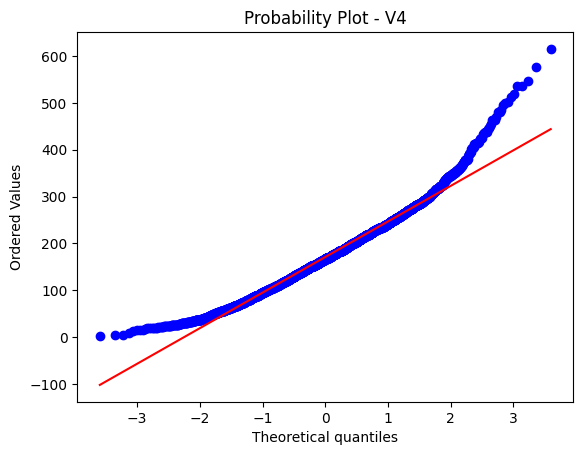

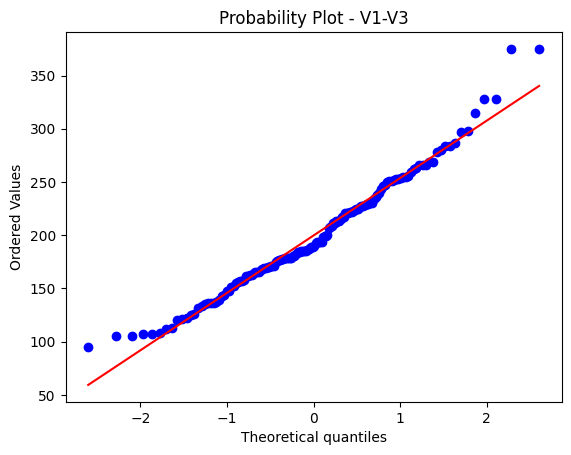

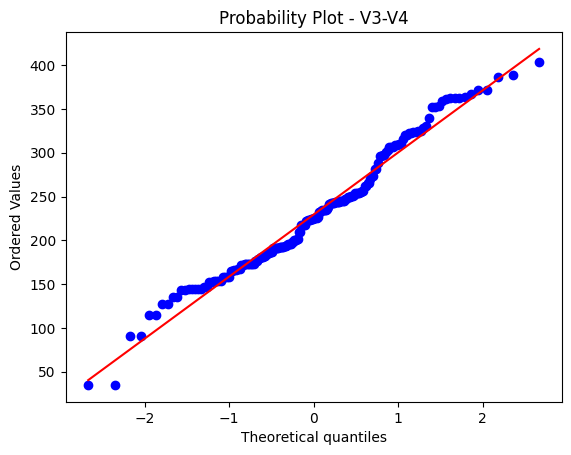

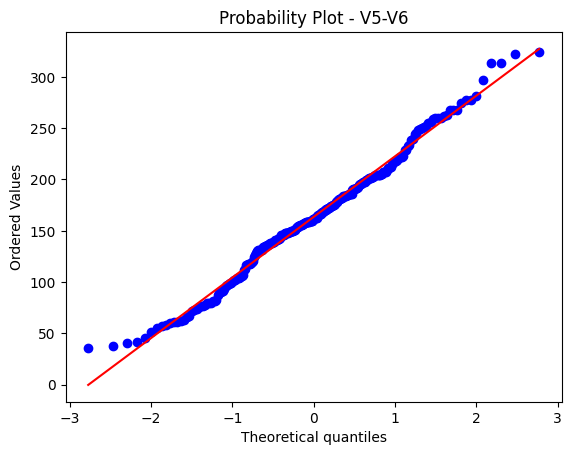

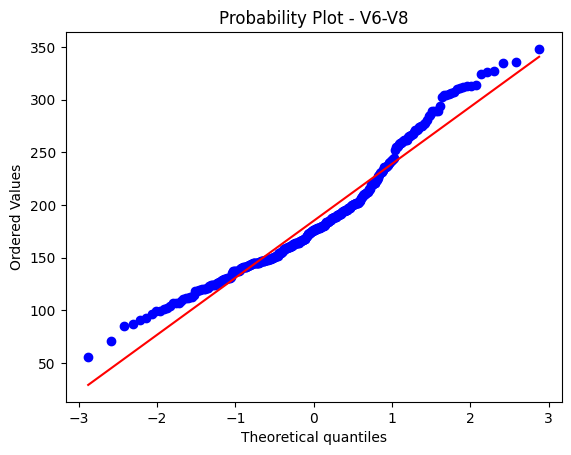

In [23]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt

## Normality check that rules out ANOVA

for amplicon in amplicons:
    stats.probplot(df[df['amplicon'] == amplicon]['observed_features'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  amplicon)
    plt.show()

    

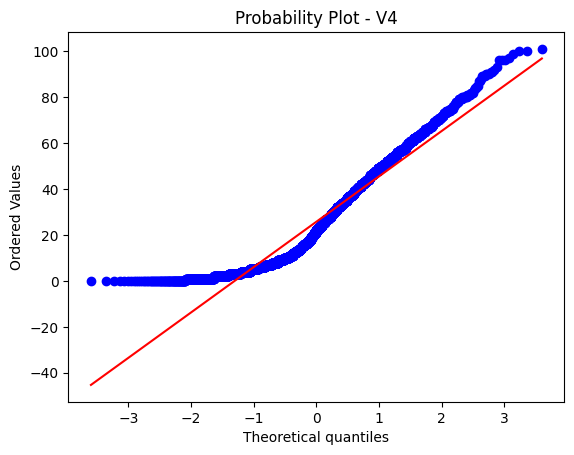

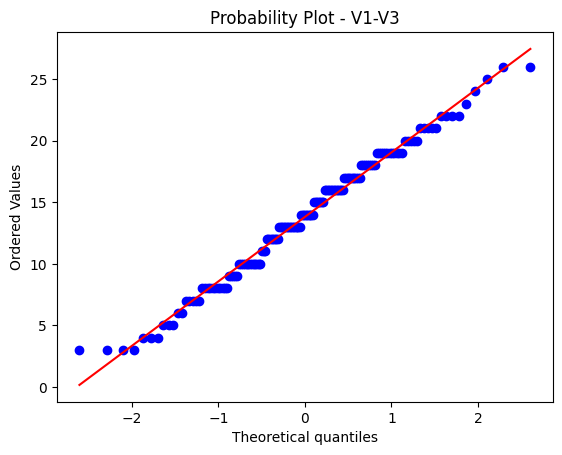

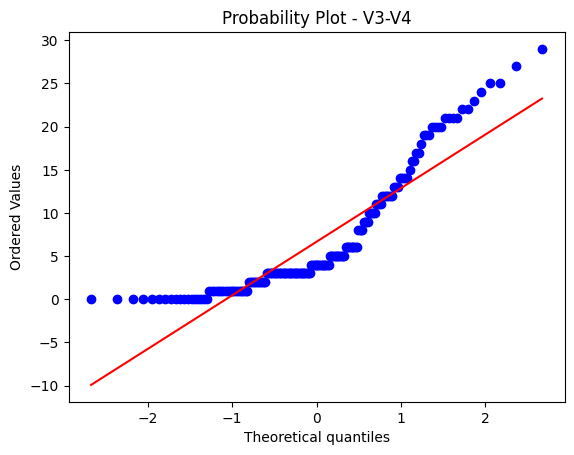

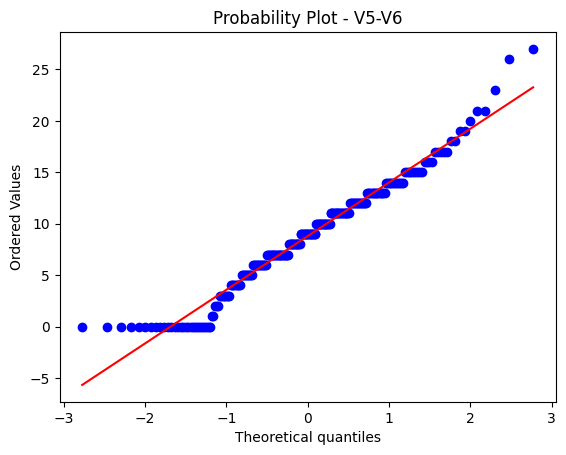

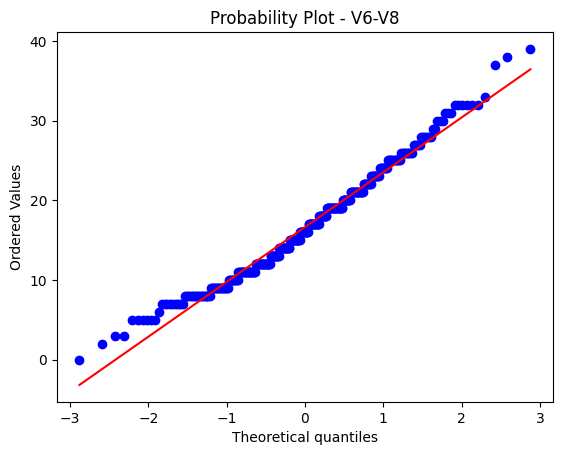

In [24]:
for amplicon in amplicons:
    stats.probplot(df[df['amplicon'] == amplicon]['singles'], dist="norm", plot=plt)
    plt.title("Probability Plot - " +  amplicon)
    plt.show()

In [20]:
#Graphs for sequencing depth

import pandas as pd
import plotly.express as px
import plotly.io as pio

pio.templates.default = "simple_white"
px.defaults.template = "ggplot2"

df = pd.read_csv('alpha_aggregated.tsv', sep= '\t')
metrics = ['observed_features', 'singles']
figbox = px.scatter(df, y=metrics,
             x = 'sample-frequency',
             facet_col ="variable", 
            color = 'folder',
            facet_col_wrap=3,
            facet_row_spacing=0.03,
            facet_col_spacing=0.04, log_x=True,
            width= 1200, height=600)
figbox.update_yaxes(matches=None)
figbox.update_traces(marker=dict(size=4))
figbox.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
figbox.update_yaxes(showticklabels=True,)
figbox.update_xaxes(showticklabels=True)
figbox.update_layout(
    template = 'ggplot2'
)
figbox.show()
figbox.write_image('rarefy.svg')

C:\Users\mauro\AppData\Local\Temp\ipykernel_1556\3591866641.py:8: DtypeWarning:

Columns (57,58,59,60,62,63,64,65,70,71,73,74,76,77,78,79,81,82,83,84,85,86,87,114,115,116,117,120,121,123,125,127,128,130,131,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,158,160,161,162,163,164,170,173,174,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,193,196,200,201,202,205,206,207,208,211,212,213,214,215,216,217,219,220,221,222,224,225,226,227,229,234,235,237,244,245,246,247,248,249,252,253,254,258,259,260,261,262,263,265,266,267,268,269,270,271,274,275,276,277,279,280,281,283,284,285,286,287,288,289,290,292,293,294,295,297,298,299,300,301,302,303,304,305,307,311,312,313,314,315,316,317,319,321,322,327,328,329,331,338,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,357,358,359,360,361,362,363,364,365,366,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,4

In [7]:
## Spearman statistics for sequencing depth

import pandas as pd
df = pd.read_csv('alpha_aggregated_2.tsv', sep= '\t')
singletons = df.observed_features.to_list()
observed = df.singles.to_list()
depth = df['sample-frequency'].to_list()

print(len(singletons), len(observed), len(depth))
from scipy import stats
res = stats.spearmanr(observed, depth)
print('Spearman for observed features vs sequencing depth:')
print( res)
res = stats.spearmanr(singletons, depth)
print('Spearman for singletons vs sequencing depth:')
print(res)

5217 5217 5217
Spearman for observed features vs sequencing depth:
SignificanceResult(statistic=-0.08689713980941335, pvalue=3.239366005700848e-10)
Spearman for singletons vs sequencing depth:
SignificanceResult(statistic=0.1358227357753221, pvalue=6.609560207924828e-23)


C:\Users\mauro\AppData\Local\Temp\ipykernel_1992\3066532842.py:2: DtypeWarning: Columns (57,58,59,60,62,63,64,65,70,71,73,74,76,77,78,79,81,82,83,84,85,86,87,114,115,116,117,120,121,123,125,127,128,130,131,134,135,136,137,138,139,140,141,142,144,145,146,147,148,149,150,151,152,153,154,155,158,160,161,162,163,164,170,173,174,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,193,196,200,201,202,205,206,207,208,211,212,213,214,215,216,217,219,220,221,222,224,225,226,227,229,234,235,237,244,245,246,247,248,249,252,253,254,258,259,260,261,262,263,265,266,267,268,269,270,271,274,275,276,277,279,280,281,283,284,285,286,287,288,289,290,292,293,294,295,297,298,299,300,301,302,303,304,305,307,311,312,313,314,315,316,317,319,321,322,327,328,329,331,338,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,357,358,359,360,361,362,363,364,365,366,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,40